In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     |████████████████████████████████| 25.9 MB 119 kB/s 
     |████████████████████████████████| 10.1 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 55.8 MB/s 
     |████████████████████████████████| 102 kB 11.0 MB/s 
     |████████████████████████████████| 675 kB 46.0 MB/s 
     |████████████████████████████████| 4.7 MB 70.8 MB/s 
     |████████████████████████████████| 62 kB 767 kB/s 
     |████████████████████████████████| 812 kB 52.1 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Normalização
from sklearn.preprocessing import StandardScaler # Padronização
from scipy.stats import norm
from pandas_profiling import ProfileReport #report teste

# **Dados sobre a velocidade do vento (MACAU)**

In [ ]:
df = pd.read_csv('/content/dataset_macau.csv')
df

In [ ]:
# Convertendo a coluna "Data" em datetime
df.Data = pd.to_datetime(df.Data)

# Tranformando a coluna "Data" em index
df.set_index('Data', inplace=True)

# Convertendo os formatos numericos de "," para "."
df['Velocidade'] = df['Velocidade'].apply(lambda x: str(x).replace(",","."))
df['Temperatura'] = df['Temperatura'].apply(lambda x: str(x).replace(",","."))
df['Umidade'] = df['Umidade'].apply(lambda x: str(x).replace(",","."))
df['Pressão'] = df['Pressão'].apply(lambda x: str(x).replace(",","."))
df['Direção'] = df['Direção'].apply(lambda x: str(x).replace(",","."))

# Convertendo tudo pra float
df['Velocidade'] = df['Velocidade'].astype(float)
df['Temperatura'] = df['Temperatura'].astype(float)
df['Umidade'] = df['Umidade'].astype(float)
df['Pressão'] = df['Pressão'].astype(float)
df['Direção'] = df['Direção'].astype(float)

# exibindo os tipos
df.info()

In [ ]:
df.head()
# df.describe()

# **Análise exploratória dos dados**

> Visualização dos dados

In [ ]:
profile = ProfileReport(df, title='Vento Macau',html={'style':{'full_width':True}})
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Text(0.5, 0, 'Anos')

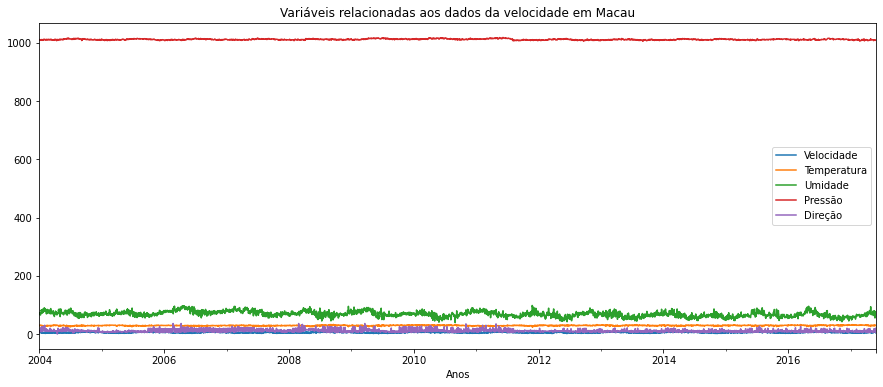

In [6]:
df.plot(figsize=(15, 6))
plt.title('Variáveis relacionadas aos dados da velocidade em Macau')
plt.xlabel('Anos')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


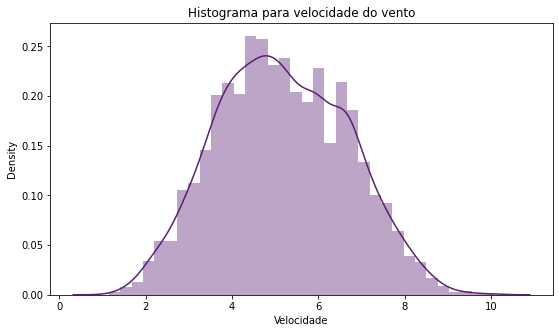

In [5]:
sns.set_color_codes(palette='dark')

f, ax = plt.subplots(figsize=(9, 5))
sns.distplot(df['Velocidade'], color="m", axlabel='Velocidade')
ax.set(title="Histograma para velocidade do vento")
plt.show()

> Avaliando a estacionariedade da serie temporal:
- Teste de estacionariedade - Teste de Dickey Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean() #media movel
    rolstd = timeseries.rolling(12).std() #desvio movel

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Média móvel & desvio padrão')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados do teste de Dickey-Fuller')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def ehEstacionaria(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística do teste','p-value','O critério de informação maximizado ','Número de observações usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    
    if(dfoutput['Estatística do teste'] < dfoutput['Valor crítico (5%)'] and dfoutput['p-value'] < 0.05):
        print('É estacionária.')
    else:
        print('Não é estacionária.')

In [ ]:
test_stationarity(df.Velocidade)

Resultados do teste de Dickey-Fuller
Estatística do teste                      -5.147908
p-value                                    0.000011
O critério de informação maximizado       30.000000
Número de observações usadas            4869.000000
Valor crítico (1%)                        -3.431694
Valor crítico (5%)                        -2.862134
Valor crítico (10%)                       -2.567086
dtype: float64
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5347a465f0> (for post_execute):


ValueError: ignored

In [ ]:
ehEstacionaria(df['Velocidade'])

É estacionária.


> Tornando uma série estacionária

In [ ]:
#dfdiff = df.Velocidade.diff()
#dfdiff = dfdiff.dropna()
#plt.title("Velocidade do vento")
#dfdiff.plot()
#plt.show()

In [ ]:
# Novo teste de estacionariedade
test_stationarity(dfdiff)

Resultados do teste de Dickey-Fuller
Estatística do teste                   -1.592452e+01
p-value                                 7.855027e-29
O critério de informação maximizado     2.900000e+01
Número de observações usadas            4.869000e+03
Valor crítico (1%)                     -3.431694e+00
Valor crítico (5%)                     -2.862134e+00
Valor crítico (10%)                    -2.567086e+00
dtype: float64
Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f5347a465f0> (for post_execute):


ValueError: ignored

In [ ]:
# Novo teste estatístico
ehEstacionaria(dfdiff)

É estacionária.


# **Pré-processamento dos dados**


> Normalização



In [ ]:
def normalizar(data_set):
  norms=[]
  minimo = np.min(data_set)
  maximo = np.max(data_set)
  
  for data in data_set:
    x = (data - minimo)/(maximo - minimo)
    norms.append(x)


  return norms

In [ ]:
df.Velocidade=normalizar(df.Velocidade)
df.Temperatura=normalizar(df.Temperatura)
df.Umidade=normalizar(df.Umidade)
df.Pressão=normalizar(df.Pressão)
df.Direção=normalizar(df.Direção)

In [ ]:
df.head()

In [ ]:
df.plot(figsize=(15, 6))

> Identificando dados ausentes

In [ ]:
df.isnull().sum()

In [ ]:
# Verificando dados duplicados
df.duplicated()

> Identificação e remoção de outliers

In [ ]:
# Instalando a biblioteca
!pip install pyod
from pyod.models.knn import KNN

In [ ]:
df.head(1)

In [ ]:
detector = KNN()
detector.fit(df.iloc[:,0:5])

In [ ]:
previsoes = detector.labels_
previsoes

In [ ]:
np.unique(previsoes, return_counts=True)

In [ ]:
confianca_previsoes = detector.decision_scores_
confianca_previsoes

In [ ]:
outliers = []
for i in range(len(previsoes)):
  # print(i)
  if previsoes[i] == 1:
    outliers.append(i)

In [ ]:
print(outliers)

In [ ]:
lista_outliers = df.iloc[outliers,:]
lista_outliers

> Identificação de romoção de outliers 2

In [ ]:
# define a function called "plot_boxplot"

def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

In [ ]:
plot_boxplot(df, "Velocidade")

In [ ]:
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 - 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return ls

In [ ]:
index_list = []
for feature in ['Velocidade']:
  index_list.extend(outliers(df, feature))

In [ ]:
index_list

> Identificação de outliers com Z-Score

In [ ]:
df.info()

In [ ]:
outliers=[]

def find_outliers(data_set):
    corte_dp =3
    media = np.mean(data_set)
    dp =np.std(data_set)
    
    i=0
    for dado in data_set:
        i=i+1 
        z_score = (dado - media)/dp 
        if np.abs(z_score) > corte_dp:
          outliers.append(dado)
          
    #print('Os outliers são: ', outliers)
    
    return outliers

In [ ]:
outliers = find_outliers(df.Velocidade)
outliers

> Identificando outliers com Amplitude interquartil

In [ ]:
Q1, Q3 = np.percentile(df.Velocidade , [25 ,75])
print('Primeiro Quartil ou Pecentil 25: ',Q1)
print('Terciro quartil ou percentil 75: ',Q3)

In [ ]:
Amp_interquartil = Q3 - Q1
print(Amp_interquartil)

In [ ]:
# determinar o limite inferior e o limite superior
limite_inferior = Q1 - (1.5 * Amp_interquartil)
limite_superior = Q3 + (1.5 * Amp_interquartil)

print('Limite Inferior: ',limite_inferior )
print('Limite Superior: ',limite_superior )

In [ ]:
outliers=[]
for data in df.Velocidade:
  if (data >= limite_superior or data <= limite_inferior):
    outliers.append(data)

In [ ]:
outliers

# **Visualização dos dados normalizados**

> Alternar as variáveis para testar a visualização dos dados

In [ ]:
df.plot()

In [ ]:
dfdiff.plot()

In [ ]:
df.Velocidade.plot()

In [ ]:
sns.boxplot(data=df)
# sns.boxplot(x=df.Velocidade)
# df.boxplot()
  # plt.grid(False)
  # plt.show()

In [ ]:
sns.boxplot(df.Velocidade)

In [ ]:
sns.displot(df.Velocidade)

In [ ]:
# z_score = np.abs(stats.zscore(df.Velocidade))
# z_score